In [1]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [2]:
df = pd.read_excel(r"C:\Users\LEONARDO ACUÑA\Documents\6 semestre\MyS\Proyecto-Monitoreo\Backend\src\data\INFLACION.xlsx")
df.head()

,Año(aaaa)-Mes(mm),Inflación total 1,Límite superior,Meta de inflación,Límite inferior
0,2023-08,11.43,4,3,2
1,2023-07,11.78,4,3,2
2,2023-06,12.13,4,3,2
3,2023-05,12.36,4,3,2
4,2023-04,12.82,4,3,2


In [3]:

df['Año(aaaa)-Mes(mm)'] = df['Año(aaaa)-Mes(mm)'].str.replace('-', '')  # Elimina el signo menos
print(df['Año(aaaa)-Mes(mm)'])
# Convierte la columna a enteros
# df['Año(aaaa)-Mes(mm)'] = df['Año(aaaa)-Mes(mm)'].astype(int)


0     202308
1     202307
2     202306
3     202305
4     202304
       ...  
63    201805
64    201804
65    201803
66    201802
67    201801
Name: Año(aaaa)-Mes(mm), Length: 68, dtype: object


In [4]:
# Convierte la columna 'Año(aaaa)-Mes(mm)' a datetime
df['ds'] = pd.to_datetime(df['Año(aaaa)-Mes(mm)'], format='%Y%m')

# Ajusta la columna 'ds' para que contenga el último día de cada fecha
df['ds'] = df['ds'] + pd.offsets.MonthEnd(0)
df['y'] = pd.to_numeric(df['Inflación total 1'])

In [5]:
print(df['ds'][9])

2022-11-30 00:00:00


In [7]:
df.shape

(68, 7)

In [8]:
df.isnull().sum() 

Año(aaaa)-Mes(mm)    0
Inflación total 1    0
Límite superior      0
Meta de inflación    0
Límite inferior      0
ds                   0
y                    0
dtype: int64

In [6]:

px.line(df, x='ds' , y='y' ,title='INFLACION 2018-2023-08')

In [7]:
print(df)

   Año(aaaa)-Mes(mm)  Inflación total 1  Límite superior  Meta de inflación  \
0             202308              11.43                4                  3   
1             202307              11.78                4                  3   
2             202306              12.13                4                  3   
3             202305              12.36                4                  3   
4             202304              12.82                4                  3   
..               ...                ...              ...                ...   
63            201805               3.16                4                  3   
64            201804               3.13                4                  3   
65            201803               3.14                4                  3   
66            201802               3.37                4                  3   
67            201801               3.68                4                  3   

    Límite inferior         ds      y  
0          

In [63]:
#metodo de modelado 
m=Prophet()
m.fit(df)

18:53:45 - cmdstanpy - INFO - Chain [1] start processing
18:53:48 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future=m.make_future_dataframe(periods=5, freq='M')
future.tail()

,ds
68,2023-09-30
69,2023-10-31
70,2023-11-30
71,2023-12-31
72,2024-01-31


In [65]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,3.699216,2.517538,4.940300
1,2018-02-28,3.582985,2.415535,4.816477
2,2018-03-31,3.520384,2.369121,4.790031
3,2018-04-30,3.387312,2.181767,4.561901
4,2018-05-31,3.203025,2.003324,4.369970
...,...,...,...,...
68,2023-09-30,14.828968,13.575451,16.056305
69,2023-10-31,15.223889,14.001523,16.466082
70,2023-11-30,15.550522,14.369626,16.733163
71,2023-12-31,16.018582,14.866415,17.111764


In [33]:
# print("forecast",forecast)
#enviar a la api
url= "http://localhost:4000/prediccion"
args= forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]
data = {"datos": args.astype({'ds': 'str'}).to_dict(orient='records')}

print("Enviar:", data)

response = requests.post(url=url, json=data)

print("status res:",response.status_code)
print("respuesta servidor:", response.text)

Enviar: {'datos': [{'ds': '2018-01-31', 'yhat': 3.699216476873149, 'yhat_lower': 2.5000616974599983, 'yhat_upper': 4.903605269816102}, {'ds': '2018-02-28', 'yhat': 3.582984533050287, 'yhat_lower': 2.3675151989447785, 'yhat_upper': 4.8755043848758275}, {'ds': '2018-03-31', 'yhat': 3.5203837371884714, 'yhat_lower': 2.239135400616459, 'yhat_upper': 4.714998495700947}, {'ds': '2018-04-30', 'yhat': 3.38731178512647, 'yhat_lower': 2.105114036359978, 'yhat_upper': 4.613560122865948}, {'ds': '2018-05-31', 'yhat': 3.203024804979851, 'yhat_lower': 1.9605741366399312, 'yhat_upper': 4.36780549064641}, {'ds': '2018-06-30', 'yhat': 3.049732368912956, 'yhat_lower': 1.8111763451103162, 'yhat_upper': 4.394030636517936}, {'ds': '2018-07-31', 'yhat': 2.92614126496054, 'yhat_lower': 1.7765305677745782, 'yhat_upper': 4.175489517232533}, {'ds': '2018-08-31', 'yhat': 2.7714094611690925, 'yhat_lower': 1.5554873199190788, 'yhat_upper': 3.978168076768071}, {'ds': '2018-09-30', 'yhat': 3.360954024392982, 'yhat_l

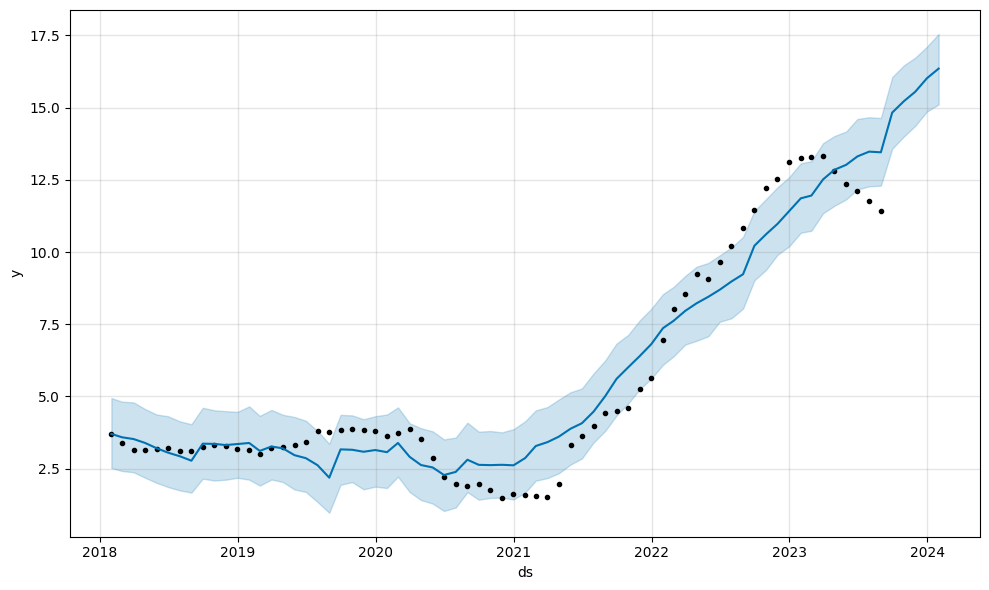

In [66]:
fig1=m.plot(forecast)